In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from passenger import *

file = open('out_p1500e10f50.bin', 'rb')

passengers = pickle.load(file)
file.close


p_dict = [vars(passenger) for passenger in passengers]


p_dict[0]


{'weight': 95.72861889340082,
 'route': [0, 29, 0],
 'floor': 0,
 'route_index': 2,
 'state': <States.Idle: 1>,
 'waitingTime': 2247,
 'rideTime': 1636}

In [2]:
data = pd.DataFrame.from_records(p_dict)
data

,weight,route,floor,route_index,state,waitingTime,rideTime
0,95.728619,"[0, 29, 0]",0,2,States.Idle,2247,1636
1,117.621122,"[0, 42, 6, 2, 0]",0,4,States.Idle,2046,2127
2,86.082854,"[0, 45, 9, 0]",0,3,States.Idle,1984,1876
3,116.442896,"[0, 9, 36, 0]",0,3,States.Idle,1528,2103
4,58.098795,"[0, 11, 27, 14, 0]",0,4,States.Idle,1523,1654
...,...,...,...,...,...,...,...
1495,49.619487,"[0, 28, 41, 33, 7, 4, 0]",0,6,States.Idle,6146,8970
1496,52.336139,"[0, 48, 0]",0,2,States.Idle,118,413
1497,63.485566,"[0, 16, 35, 7, 17, 44, 0]",0,6,States.Idle,5775,5585
1498,41.751772,"[0, 17, 31, 16, 20, 19, 0]",0,6,States.Idle,3656,5661


<AxesSubplot:ylabel='Frequency'>

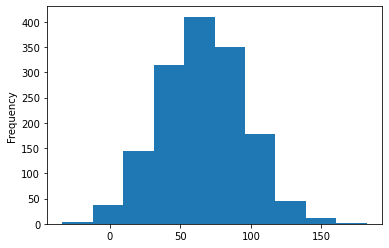

In [3]:
data['weight'].plot.hist(bins=10)

In [4]:
data['meanWait'] = data.waitingTime / data['route'].map(len)
data['meanTravel'] = data.rideTime / data['route'].map(len)
data

,weight,route,floor,route_index,state,waitingTime,rideTime,meanWait,meanTravel
0,95.728619,"[0, 29, 0]",0,2,States.Idle,2247,1636,749.000000,545.333333
1,117.621122,"[0, 42, 6, 2, 0]",0,4,States.Idle,2046,2127,409.200000,425.400000
2,86.082854,"[0, 45, 9, 0]",0,3,States.Idle,1984,1876,496.000000,469.000000
3,116.442896,"[0, 9, 36, 0]",0,3,States.Idle,1528,2103,382.000000,525.750000
4,58.098795,"[0, 11, 27, 14, 0]",0,4,States.Idle,1523,1654,304.600000,330.800000
...,...,...,...,...,...,...,...,...,...
1495,49.619487,"[0, 28, 41, 33, 7, 4, 0]",0,6,States.Idle,6146,8970,878.000000,1281.428571
1496,52.336139,"[0, 48, 0]",0,2,States.Idle,118,413,39.333333,137.666667
1497,63.485566,"[0, 16, 35, 7, 17, 44, 0]",0,6,States.Idle,5775,5585,825.000000,797.857143
1498,41.751772,"[0, 17, 31, 16, 20, 19, 0]",0,6,States.Idle,3656,5661,522.285714,808.714286


<AxesSubplot:ylabel='Frequency'>

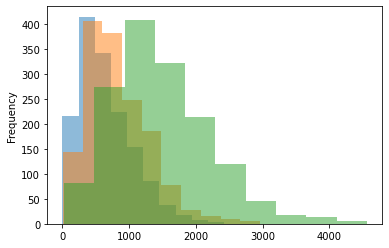

In [5]:
data.meanWait.plot.hist(alpha=0.5)
data.meanTravel.plot.hist(alpha=0.5)
(data.meanWait + data.meanTravel).plot.hist(alpha=0.5)

In [6]:
data.meanWait.describe()

count    1500.000000
mean      646.463948
std       409.877806
min         0.000000
25%       351.553571
50%       553.250000
75%       893.025000
max      2419.666667
Name: meanWait, dtype: float64